Suggested dimensions for U: 20
Suggested dimensions for Y: 1
Shape of U_p: (13, 981)
Rank of U_p: 13
Condition number of U_p: 1.0879676714753048
Shape of U_f: (7, 981)
Rank of U_f: 7
Condition number of U_f: 1.050041304053767
Shape of Y_p: (13, 981)
Rank of Y_p: 13
Condition number of Y_p: 3302.7263725316093
Shape of Y_f: (7, 981)
Rank of Y_f: 7
Condition number of Y_f: 2170.270806251865
Shape of A: (33, 981)
Rank of A: 22
Condition number of A: 5.7136188438214216e+16
Shape of M: (7, 33)
Rank of M: 7
Condition number of M: 1066.7990726474218
Shape of G: (7, 7)
Rank of G: 7
Condition number of G: 3166.19531029853
[[0], [0], [0], [0], [0], [0], [0]]
uini  deque([array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]])], maxlen=13)
[[0], [0], [0], [0], [0], [0], [0]]
uini  deque([array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), array([[0]]), arra

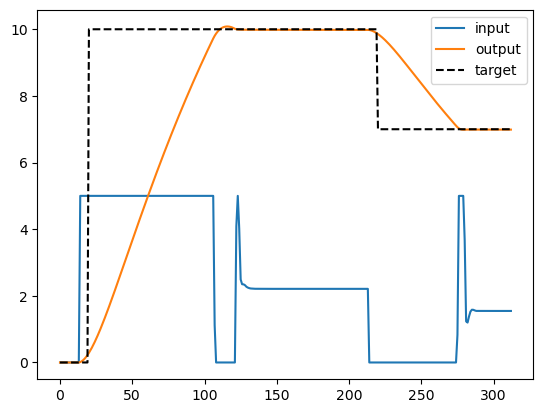

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from deepc import Controller, DiscreteLTI

# Define a system
system = DiscreteLTI(
    A=[[1.9154297228892199, -0.9159698592594919], [1.0, 0.0]],
    B=[[0.0024407501942859677], [0.0]],
    C=[[1, 0]],
    D=[[0]],
    x_ini=[1, 1],
)

# Define constraints for the input
min_input = 0
max_input = 5
constraint = lambda u: np.clip(u, min_input, max_input)

# Gather offline data
N = 100
# by defining an input sequence
u_d = np.random.uniform(min_input, max_input, (N, system.input_dim))
# and applying it to the system
y_d = system.apply_multiple(u_d)

# Define how many steps the controller should look back
# to grasp the current state of the system
T_ini = 13

# Define how many steps the controller should look forward
r_len = 7


# Define the controller
controller = Controller(u_d, y_d, T_ini, r_len, input_constrain_fkt=constraint)

# Reset the system
# to sepereate the offline data from the online data
system.set_state([0, 0])  # This is intentionally not the same state as x_ini

# Warm up the controller
while not controller.is_initialized():
    u = [0]
    y = system.apply(u)
    controller.update(u, y)

# Simulate the system
u_online = []
y_online = []
r_online = [[0]] * 20 + [[10]] * 200 + [[7]] * 100
for i in range(len(r_online) - r_len):
    r = r_online[i: i + r_len]
    print(r)
    u = controller.apply(r)[0]
    y = system.apply(u)
    controller.update(u, y)
    u_online.append(u)
    y_online.append(y)

# Plot the results
plt.plot(u_online, label="input")
plt.plot(y_online, label="output")
plt.plot(r_online[:len(y_online)], label="target", color="black", linestyle="--")
plt.legend()